# Curse of Dimensionality

## TASK 2
### part A
Sample 100 uniformly distributed random vectors from the box $[−1, 1]^d$   for d = 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##  Sample 100 uniformly distributed random vectors from the box [−1, 1]d for d = 2.
def sample(n,d):
    X=np.random.uniform(-1,1,size=(n,d))
    return X

In [3]:
X=sample(100,2)

<function matplotlib.pyplot.show>

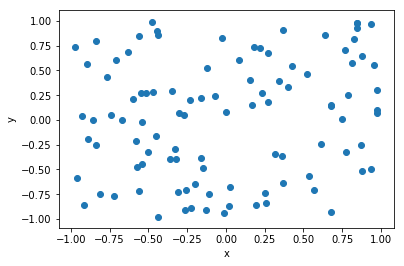

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show

### part B 
For each of the 100 vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors x, y the cosine of the angle between the two vectors is defined as $$cos(\angle(x,y))=\frac {\langle x,y \rangle}{\lVert x \rVert \lVert y \rVert}$$


In [7]:
def minangle(X):
    ##calculate cosine of the angle between two vectors
    scalardot_mat=np.dot(X,X.T)
    X_norm=np.linalg.norm(X,axis=1)
    ##generate matrix of ||X||*||y||
    width=len(X[:,0])
    X_norm_mat=np.zeros((width,width))
    for i in range(width):
        X_norm_mat[:,i]=np.dot(X_norm[i],X_norm)
    X_angle=np.divide(scalardot_mat,X_norm_mat)
    ##matrix of cosine of angle between two vector s   
    np.fill_diagonal(X_angle,0)
    MinAngle_cos=np.amax(X_angle,axis=0)
    ##calculate angle
    MinAngle=np.arccos(MinAngle_cos)

    return MinAngle

In [8]:
MinAng=minangle(X)
ang_mean=np.mean(MinAng)

In [9]:
print('the avrage of these minimum angles is {}'.format(ang_mean))

the avrage of these minimum angles is 0.026951325900092128


### part C
Repeat the above for dimensions d = 1, . . . , 1000 and use the results to plot the average minimum angle against the dimension.

In [11]:
def NDim(n,d):
    ang_mean=np.zeros((d+1,1))
    for i in range(1,d+1):
        X=sample(n,i)
        MinAng=minangle(X)
        ang_mean[i,0]=np.mean(MinAng)
    return ang_mean

In [12]:
ang_mean=NDim(100,1000)

In [13]:
def imshow(n,d,X):
    plt.plot(range(d+1),ang_mean)
    plt.xlabel('Dimension d')
    plt.ylabel('average minimum angle')
    plt.title('sample size:{}'.format(n))
    plt.show()
    return

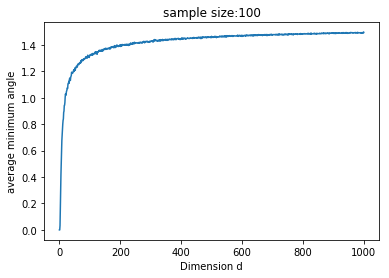

In [15]:
imshow(100,1000,ang_mean)

### part D
Give an interpretation of the result. What conclusions can you draw for 2 randomly sampled vectors in a d-dimensional space?

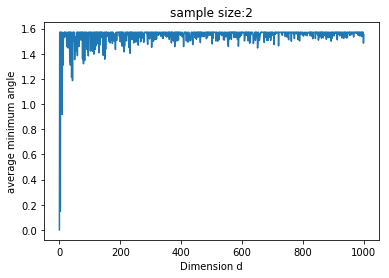

In [20]:
ang_mean=NDim(2,1000)
imshow(2,1000,ang_mean)


### part E
Does the result change if the sample size increases?


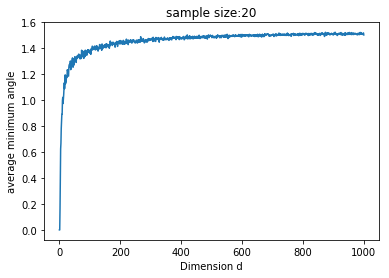

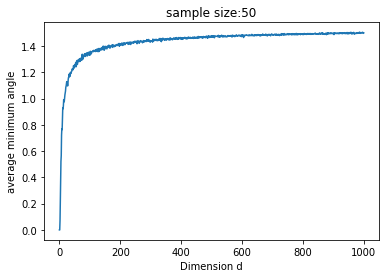

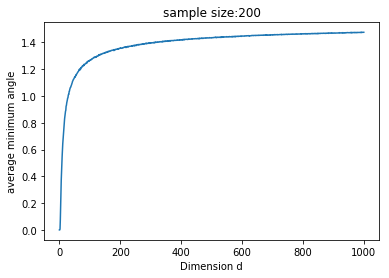

In [21]:
ang_mean=NDim(20,1000)
imshow(20,1000,ang_mean)
ang_mean=NDim(50,1000)
imshow(50,1000,ang_mean)
ang_mean=NDim(500,1000)
imshow(200,1000,ang_mean)

The minimum angle between a vector and its "neigbour" tends to be 90 degree with the increase of dimension. As the samples size increas, the result doesn't change but the tends to be more stables.